In [1]:
import os 

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
os.chdir('/content/drive/MyDrive')

# Spazzo il testo in frasi
Non mi interessa pulirle da caratteri strani, tanto devo solo cercare se vi compaiono i nomi dei personaggi

In [4]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [5]:
with open("HP1.txt") as file:
    text = file.read()
from nltk.tokenize import sent_tokenize
text = sent_tokenize(text)
print(text[:5])

["\n1\nHarry Potter and the Sorcerer's Stone\nCHAPTER ONE\nTHE BOY WHO LIVED\nMr. and Mrs. Dursley, of number four, Privet Drive, were proud to say\nthat they were perfectly normal, thank you very much.", "They were the last\npeople you'd expect to be involved in anything strange or mysterious,\nbecause they just didn't hold with such nonsense.", 'Mr. Dursley was the director of a firm called Grunnings, which made\ndrills.', 'He was a big, beefy man with hardly any neck, although he did\nhave a very large mustache.', 'Mrs. Dursley was thin and blonde and had\nnearly twice the usual amount of neck, which came in very useful as she\nspent so much of her time craning over garden fences, spying on the\nneighbors.']


# Definisco un dizionario di pseudonimi
Inserisco i principali personaggi ed associato ad ognuno di loro le stringe che li identificano nel testo.
Questo è fondamentale perché se usiamo i nomi ci sono ambiguità (ad esempio fratelli con lo stesso cognome), e perché alcuni personaggi hanno degli pseudonimi diversi dal nome (tu sai chi).

In [6]:
characters = {"Harry Potter" : ["harry"], "Ronald Weasley" : ["ron", "ronald"], 
              "Hermione Granger" : ["hermione", "granger"], "Rubeus Hagrid" : ["rubeus", "hagrid"],
              "Albus Dumbledore" : ["albus", "dumbledore"], "Draco Malfoy" : ["draco"],
              "Minerva McGonagall" : ["minerva", "mcgonagall"], "Severus Snape" : ["severus", "snape"],
              "Ginny Weasley" : ["ginny"], "Lucius Malfoy" : ["lucius"], "Vernon Dursley" : ["vernon"],
              "Petunia Dursley" : ["petunia"], "Dudley Dursley" : ["dudley"], "Arthur Weasley" : ["arthur"], 
              "Molly Weasley" : ["molly"], "Trelawney" : ["trelawney"],
              "Neville Longbottom" : ["neville"], "Fred Weasley" : ["fred"], 
              "George Weasley" : ["george"], "Lord Voldemort" : ["voldemort", "you-know-who", "you know who"], 
              "Argus Filch" : ["argus", "filch"], "Bill Weasley" : ["bill"], "Ollivander" : ["ollivander"],
              "Sprout" : ["sprout"], "Percy Weasley" : ["percy"], "Charlie Weasley" : ["charlie"],
              "Oliver Wood" : ["oliver", "wood"], "Seamus Finnigan" : ["seamus", "finnigan"],
              "Vincent Crabbe" : ["vincent", "crabbe"], "Gregory Goyle" : ["gregory", "goyle"], 
              "Marcus Flint" : ["marcus", "flint"], "James Potter" : ["james"], "Lily Evans" : ["lily", "evans"],
              "Rolanda Hooch" : ["rolanda", "hooch"], "Filius Flitwick" : ["filius", "flitwick"], "Quirrell" : ["quirrell"]}

## Controllo e rimuovo eventuali personaggi non presenti nel libro

In [7]:
to_be_deleted = [character for character, names in characters.items() if sum([name in " ".join(text).lower() for name in names]) == 0]
print(to_be_deleted)

['Lucius Malfoy', 'Arthur Weasley', 'Molly Weasley', 'Trelawney']


In [8]:
[characters.pop(key) for key in to_be_deleted]
print([character for character, names in characters.items() if sum([name in " ".join(text).lower() for name in names]) == 0])

[]


# Creo la sociomatrice
Fortunatamente gira in 1 secondo, quindi se serve possiamo fare questo per moli di dati anche più grandi, ad esempio includere tutti i libri (ammesso che si trovino online)

In [9]:
import numpy as np
import itertools 

n = len(characters.keys())
textlength = len(text)
sociomatrix = np.zeros((n,n))
characters_array = np.array(list(characters.keys()))

for i, sentence in enumerate(text):
    characters_in_sentence = set()
    sentence = sentence.lower()
    for c, names in characters.items():
        for name in names:
            if name in sentence:
                characters_in_sentence.add(c)
    for subset in itertools.combinations(characters_in_sentence, 2):
        i = np.argwhere(subset[0] == characters_array)
        j = np.argwhere(subset[1] == characters_array)
        sociomatrix[i, j] += 1
        sociomatrix[j, i] += 1
        
    print(f"{np.round(i*100/textlength, 2)}% done", end="\r")

In [10]:
import pandas as pd
pd.DataFrame(sociomatrix, columns= characters_array, index=characters_array)

,Harry Potter,Ronald Weasley,Hermione Granger,Rubeus Hagrid,Albus Dumbledore,Draco Malfoy,Minerva McGonagall,Severus Snape,Ginny Weasley,Vernon Dursley,Petunia Dursley,Dudley Dursley,Neville Longbottom,Fred Weasley,George Weasley,Lord Voldemort,Argus Filch,Bill Weasley,Ollivander,Sprout,Percy Weasley,Charlie Weasley,Oliver Wood,Seamus Finnigan,Vincent Crabbe,Gregory Goyle,Marcus Flint,James Potter,Lily Evans,Rolanda Hooch,Filius Flitwick,Quirrell
Harry Potter,0.0,178.0,82.0,75.0,24.0,3.0,18.0,36.0,0.0,28.0,13.0,38.0,26.0,7.0,4.0,11.0,9.0,4.0,6.0,0.0,3.0,1.0,18.0,9.0,5.0,6.0,5.0,1.0,1.0,0.0,2.0,25.0
Ronald Weasley,178.0,0.0,81.0,31.0,7.0,0.0,9.0,16.0,1.0,2.0,2.0,3.0,16.0,2.0,3.0,4.0,2.0,1.0,1.0,0.0,2.0,4.0,2.0,2.0,3.0,4.0,0.0,1.0,1.0,1.0,3.0,6.0
Hermione Granger,82.0,81.0,0.0,11.0,2.0,1.0,3.0,11.0,0.0,1.0,0.0,0.0,17.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,3.0
Rubeus Hagrid,75.0,31.0,11.0,0.0,10.0,0.0,5.0,8.0,0.0,2.0,1.0,1.0,4.0,1.0,0.0,3.0,2.0,1.0,2.0,0.0,0.0,2.0,2.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0
Albus Dumbledore,24.0,7.0,2.0,10.0,0.0,0.0,10.0,2.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,4.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,2.0,1.0
Draco Malfoy,3.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
Minerva McGonagall,18.0,9.0,3.0,5.0,10.0,0.0,0.0,6.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,0.0,0.0,3.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,3.0,3.0
Severus Snape,36.0,16.0,11.0,8.0,2.0,0.0,6.0,0.0,0.0,0.0,0.0,0.0,2.0,1.0,2.0,5.0,7.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,4.0,9.0
Ginny Weasley,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Vernon Dursley,28.0,2.0,1.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,12.0,21.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


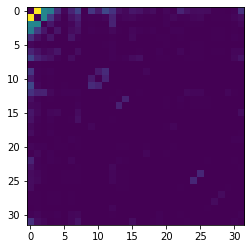

In [11]:
import matplotlib.pyplot as plt

plt.imshow(sociomatrix)
plt.show()

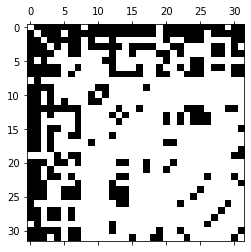

In [12]:
plt.spy(sociomatrix)
plt.show()

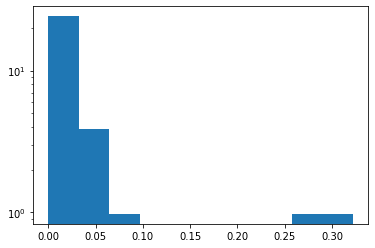

In [13]:
# distribution of betweenness centrality

import networkx as nx

G = nx.from_numpy_array(sociomatrix)


bet_centr = nx.betweenness_centrality(G)
bet_centr = dict([(characters_array[i],bet_centr[i]) for i in range(len(bet_centr))])
sorted_centrality = sorted(bet_centr.items(), key=lambda item: item[1],reverse  = True)
bet_centr = pd.DataFrame( [el[1]/sum(bet_centr.values()) for el in sorted_centrality] ,columns = ['bet_centrality'],index = [el[0] for el in sorted_centrality] )

plt.hist(bet_centr['bet_centrality'],log = True,density = True)
plt.show()

In [14]:
bet_centr

,bet_centrality
Ronald Weasley,0.321741
Harry Potter,0.265632
Rubeus Hagrid,0.095560
Severus Snape,0.057962
Minerva McGonagall,0.040853
Neville Longbottom,0.040467
Albus Dumbledore,0.034678
Hermione Granger,0.029081
Quirrell,0.019370
Percy Weasley,0.016581


# Regressione logistica per la previsione di lati

In [15]:
import pandas as pd

F  = [[41,'Potter','G'],
      [41,'Weasley','G'],
      [42,'Granger','G'],
      [93,'Hagrid','G'],
      [140,'Dumbledore','G'],
      [42,'Malfoy','S'],
      [140,'McGonall','G'],
      [61,'Snape','S'],
      [40,'Weasley','G'],
      [81,'Dursley','B'],   # B per babbano
      [0,'Dursley','B'], 
      [41,'Dursley','B'],
      [41,'Longbottom','G'],
      [43,'Weasley','G'],
      [43,'Weasley','G'],
      [95,'Voldemort','S'],
      [70,'Filch','NA'],
      [51,'Weasley','G'],
      [0,'Ollivander','R'], #Ravenclaw    # where zero it is NA
      [70,'Sprout','H'],   #Hufflepuff
      [45,'Weasley','G'],
      [49,'Weasley','G'],
      [46,'Wood','G'],
      [41,'Finnigan','G'],
      [41,'Crabbe','S'],
      [41,'Goyle','S'],
      [46,'Flint','S'],
      [61,'Potter','G'] ,
      [61,'Evans','G'],
      [103,'Hooch','NA'],
      [64,'Flitwick','R'],
      [54,'Quirrel','R']
       ]
features = pd.DataFrame( F  ,index = characters.keys()  ,columns = ['age','surname','house']   )

In [16]:
features

,age,surname,house
Harry Potter,41,Potter,G
Ronald Weasley,41,Weasley,G
Hermione Granger,42,Granger,G
Rubeus Hagrid,93,Hagrid,G
Albus Dumbledore,140,Dumbledore,G
Draco Malfoy,42,Malfoy,S
Minerva McGonagall,140,McGonall,G
Severus Snape,61,Snape,S
Ginny Weasley,40,Weasley,G
Vernon Dursley,81,Dursley,B


In [17]:
# costruzione delle edge features

features_age = np.outer(np.array(features['age']),np.array(features['age']))
features_relative = np.zeros(shape = (len(features),len(features)))
features_same_house = np.zeros(shape = (len(features),len(features)))

for i in range(len(features)):

  for j in range(i+1,len(features)):

    features_relative[i,j] = (features['surname'][i] == features['surname'][j] )   # indicatrice se due personaggi sono della stessa famiglia
    features_relative[j,i] = features_relative[i,j]

    features_same_house[i,j] = ((features['house'][i] == features['house'][j]  and features['house'][j] not in ['NA','B'] and features['house'][i] not in ['NA','B']))   
    features_same_house[j,i] = features_same_house[i,j]                            # indicatrice se due personaggi sono della stessa casata

features_age = features_age.flatten()
features_relative = features_relative.flatten()
features_same_house = features_same_house.flatten()



In [18]:
from sklearn.linear_model import LogisticRegressionCV,LogisticRegression
import warnings
warnings.filterwarnings('ignore') 

max_interaction = np.max(sociomatrix)
weights = sociomatrix.flatten()/np.sum(sociomatrix)     # weights for weighting the loss in case it's needed (was causing problems)

y = np.vectorize(lambda x: 1 if x>0 else 0)(sociomatrix.flatten())

n = sociomatrix.shape[0]

degrees = sociomatrix@np.ones(sociomatrix.shape[0])
bet_centr = np.array(list(nx.betweenness_centrality(G).values()))
pagerank_centr = np.array(list(nx.algorithms.link_analysis.pagerank_alg.pagerank(G).values()))
closeness_centr = np.array(list( nx.closeness_centrality(G).values() ))
edge_density = np.mean(sociomatrix)

F = np.vstack((features_age,features_relative,features_same_house)).T


#X = np.zeros((n,n,9))
X = np.zeros((n,n,n))

for feat_index in range(n):   # problem: Y is symmetric

  for i in range(n):

    for j in range(n):

      #X[i,j] = np.array( [degrees[i],degrees[j],bet_centr[i],bet_centr[j],pagerank_centr[i],pagerank_centr[j],
                  #        closeness_centr[i],closeness_centr[j],edge_density
                 #         ] 
                 #       )

      #X[i,j] = np.hstack((sociomatrix[i],sociomatrix[j]))

      X[i,j]= sociomatrix[i]*sociomatrix[j]      # including as regressor the indicator of common neighbors

X = X.reshape( X.shape[0]*X.shape[1],X.shape[2] )

X = np.hstack((X,F))                             # including features


#lr = LogisticRegressionCV(penalty = 'elasticnet',solver = 'saga',l1_ratios = [0,0.2,0.5,0.8,1])
lr = LogisticRegression(penalty = 'elasticnet',solver = 'saga',l1_ratio = 0.5,C = 0.001)

lr.fit(X,y)#sample_weight = sociomatrix.flatten() )   # why not working for the weights?

lr.coef_

coefs = pd.DataFrame(lr.coef_.T,index = (list(characters.keys())+['age','surname','house']) )

In [19]:
coefs

,0
Harry Potter,0.000335
Ronald Weasley,0.000072
Hermione Granger,-0.000003
Rubeus Hagrid,0.000188
Albus Dumbledore,0.000095
Draco Malfoy,0.000000
Minerva McGonagall,0.000125
Severus Snape,0.000299
Ginny Weasley,0.000000
Vernon Dursley,0.000000


In [20]:
pred_probs = lr.predict_proba(X)[:,1]
pred_probs = np.vectorize(lambda x: 1 if x>0.5 else 0)(pred_probs)

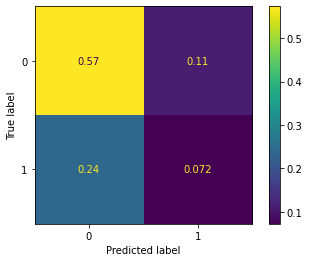

In [32]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay


disp = ConfusionMatrixDisplay(confusion_matrix(y.flatten(), pred_probs,normalize = 'all'))
disp.plot()
plt.show()

# this model is not able to correctly predict interactions that will happen in future books

# High dimensional exponential model with lasso   (was not useful at all)

We try here the simplest model in which there's one statistic per edge and it's $\psi(Y) = 1$, so it is $P(Y|\theta) \propto \exp(\sum_{i,j}\theta_{ij}Y_{ij})$. This model is high dimensional, so we need variable selection

In [53]:
lr =   LogisticRegression(penalty = 'elasticnet',solver = 'saga',l1_ratio = 0.5,C = 10000) #LogisticRegressionCV(penalty = 'elasticnet',solver = 'saga',l1_ratios = [0.2,0.5,0.8])
lr.fit(np.identity(y.shape[0]),y,sample_weight = sociomatrix.flatten())

LogisticRegression(C=10000, l1_ratio=0.5, penalty='elasticnet', solver='saga')

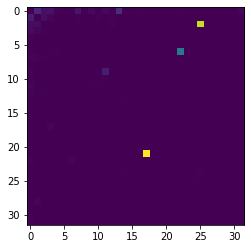

In [54]:
plt.imshow(lr.coef_.reshape((sociomatrix.shape[0],sociomatrix.shape[1])))
plt.show()

In [55]:
theta = 0.5*(lr.coef_.reshape((sociomatrix.shape[0],sociomatrix.shape[1]))+lr.coef_.reshape((sociomatrix.shape[0],sociomatrix.shape[1])).T)  #symmetrize the weights matrix
pd.DataFrame( theta , index = characters.keys(),columns = characters.keys())

,Harry Potter,Ronald Weasley,Hermione Granger,Rubeus Hagrid,Albus Dumbledore,Draco Malfoy,Minerva McGonagall,Severus Snape,Ginny Weasley,Vernon Dursley,Petunia Dursley,Dudley Dursley,Neville Longbottom,Fred Weasley,George Weasley,Lord Voldemort,Argus Filch,Bill Weasley,Ollivander,Sprout,Percy Weasley,Charlie Weasley,Oliver Wood,Seamus Finnigan,Vincent Crabbe,Gregory Goyle,Marcus Flint,James Potter,Lily Evans,Rolanda Hooch,Filius Flitwick,Quirrell
Harry Potter,0.000000,0.302236,0.120518,0.129294,0.031032,0.000000,0.021650,0.108205,0.0,0.050583,0.015477,0.058013,0.033086,0.224374,0.002506,0.010841,0.015038,0.001286,0.006936,0.0,0.000000,0.000000,0.024095,0.008453,0.002594,0.005452,0.003656,0.000000,0.000000,0.000000,0.000000,0.046033
Ronald Weasley,0.302236,0.000000,0.112017,0.044752,0.005710,0.000000,0.009345,0.024736,0.0,0.000362,0.013953,0.000254,0.016197,0.000000,0.000000,0.000609,0.000000,0.000000,0.000000,0.0,0.000000,0.002644,0.000000,0.000000,0.000000,0.001893,0.000000,0.000000,0.022293,0.000000,0.000000,0.003128
Hermione Granger,0.120518,0.112017,0.000000,0.021108,0.000000,0.000634,0.000000,0.014325,0.0,0.000000,0.000000,0.000000,0.022771,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,1.472247,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Rubeus Hagrid,0.129294,0.044752,0.021108,0.000000,0.010241,0.000000,0.009547,0.005315,0.0,0.000000,0.000000,0.000000,0.001359,0.000000,0.000000,0.000105,0.000000,0.021910,0.000093,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Albus Dumbledore,0.031032,0.005710,0.000000,0.010241,0.000000,0.000000,0.011067,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.001552,0.000000,0.000000,0.000000,0.0,0.000166,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000165,0.000000
Draco Malfoy,0.000000,0.000000,0.000634,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Minerva McGonagall,0.021650,0.009345,0.000000,0.009547,0.011067,0.000000,0.000000,0.003999,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.656115,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000736,0.000000
Severus Snape,0.108205,0.024736,0.014325,0.005315,0.000000,0.000000,0.003999,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000375,0.002568,0.006567,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.002910,0.008373
Ginny Weasley,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Vernon Dursley,0.050583,0.000362,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.012231,0.133273,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [59]:
[(characters_array[i],characters_array[j]) for i in range(32) for j in range(32) if (theta == np.max(theta))[i,j]==1]   # maximum interactions

[('Bill Weasley', 'Charlie Weasley'), ('Charlie Weasley', 'Bill Weasley')]

In [60]:
def sigmoid(v):
  return np.vectorize(lambda x : 1 / (1 + np.exp(-x)))(v)

In [61]:
pd.DataFrame( sigmoid(theta) , index = characters.keys(),columns = characters.keys())

,Harry Potter,Ronald Weasley,Hermione Granger,Rubeus Hagrid,Albus Dumbledore,Draco Malfoy,Minerva McGonagall,Severus Snape,Ginny Weasley,Vernon Dursley,Petunia Dursley,Dudley Dursley,Neville Longbottom,Fred Weasley,George Weasley,Lord Voldemort,Argus Filch,Bill Weasley,Ollivander,Sprout,Percy Weasley,Charlie Weasley,Oliver Wood,Seamus Finnigan,Vincent Crabbe,Gregory Goyle,Marcus Flint,James Potter,Lily Evans,Rolanda Hooch,Filius Flitwick,Quirrell
Harry Potter,0.500000,0.574989,0.530093,0.532278,0.507757,0.500000,0.505412,0.527025,0.5,0.512643,0.503869,0.514499,0.508271,0.555859,0.500626,0.502710,0.503759,0.500321,0.501734,0.5,0.500000,0.500000,0.506024,0.502113,0.500648,0.501363,0.500914,0.500000,0.500000,0.500000,0.500000,0.511506
Ronald Weasley,0.574989,0.500000,0.527975,0.511186,0.501428,0.500000,0.502336,0.506184,0.5,0.500090,0.503488,0.500063,0.504049,0.500000,0.500000,0.500152,0.500000,0.500000,0.500000,0.5,0.500000,0.500661,0.500000,0.500000,0.500000,0.500473,0.500000,0.500000,0.505573,0.500000,0.500000,0.500782
Hermione Granger,0.530093,0.527975,0.500000,0.505277,0.500000,0.500159,0.500000,0.503581,0.5,0.500000,0.500000,0.500000,0.505693,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,0.5,0.500000,0.500000,0.500000,0.500000,0.500000,0.813399,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000
Rubeus Hagrid,0.532278,0.511186,0.505277,0.500000,0.502560,0.500000,0.502387,0.501329,0.5,0.500000,0.500000,0.500000,0.500340,0.500000,0.500000,0.500026,0.500000,0.505477,0.500023,0.5,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000
Albus Dumbledore,0.507757,0.501428,0.500000,0.502560,0.500000,0.500000,0.502767,0.500000,0.5,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,0.500388,0.500000,0.500000,0.500000,0.5,0.500042,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,0.500041,0.500000
Draco Malfoy,0.500000,0.500000,0.500159,0.500000,0.500000,0.500000,0.500000,0.500000,0.5,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,0.5,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000
Minerva McGonagall,0.505412,0.502336,0.500000,0.502387,0.502767,0.500000,0.500000,0.501000,0.5,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,0.5,0.500000,0.500000,0.658387,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,0.500184,0.500000
Severus Snape,0.527025,0.506184,0.503581,0.501329,0.500000,0.500000,0.501000,0.500000,0.5,0.500000,0.500000,0.500000,0.500000,0.500000,0.500094,0.500642,0.501642,0.500000,0.500000,0.5,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,0.500728,0.502093
Ginny Weasley,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,0.5,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,0.5,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000
Vernon Dursley,0.512643,0.500090,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,0.5,0.500000,0.503058,0.533269,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,0.5,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000


# Ergm on nodes

$$
P(Y|\theta) \propto \exp \bigl( \sum_{i,j = 1}^{n}\theta_{i}Y_{ij} \bigr)
$$

In [62]:
lr =   LogisticRegression(penalty = 'elasticnet',solver = 'saga',l1_ratio = 0.8,C = 0.2) #LogisticRegressionCV(penalty = 'elasticnet',solver = 'saga',l1_ratios = [0.2,0.5,0.8])
X = np.vstack( [ np.array([np.identity(sociomatrix.shape[0])[i]]*sociomatrix.shape[0]) for i in range(sociomatrix.shape[0])] ) #just including a statistic per node
lr.fit(X,y)#,sample_weight = sociomatrix.flatten())

LogisticRegression(C=0.2, l1_ratio=0.8, penalty='elasticnet', solver='saga')

In [ ]:
pd.DataFrame( lr.coef_.T , index = characters.keys())

,0
Harry Potter,1.803490
Ronald Weasley,1.803585
Hermione Granger,0.298118
Rubeus Hagrid,0.876701
Albus Dumbledore,0.298148
Draco Malfoy,0.000000
Minerva McGonagall,0.419200
Severus Snape,0.651784
Ginny Weasley,-0.570628
Vernon Dursley,0.000000


In [ ]:
pd.DataFrame( sigmoid(np.outer(lr.coef_,lr.coef_)) , index = characters.keys(),columns = characters.keys())

,Harry Potter,Ronald Weasley,Hermione Granger,Rubeus Hagrid,Albus Dumbledore,Draco Malfoy,Minerva McGonagall,Severus Snape,Ginny Weasley,Vernon Dursley,Petunia Dursley,Dudley Dursley,Neville Longbottom,Fred Weasley,George Weasley,Lord Voldemort,Argus Filch,Bill Weasley,Ollivander,Sprout,Percy Weasley,Charlie Weasley,Oliver Wood,Seamus Finnigan,Vincent Crabbe,Gregory Goyle,Marcus Flint,James Potter,Lily Evans,Rolanda Hooch,Filius Flitwick,Quirrell
Harry Potter,0.962766,0.962772,0.631266,0.829363,0.631279,0.5,0.680490,0.764135,0.263254,0.5,0.5,0.5,0.631281,0.5,0.5,0.5,0.5,0.5,0.456695,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.392260,0.5,0.5
Ronald Weasley,0.962772,0.962778,0.631273,0.829375,0.631285,0.5,0.680498,0.764146,0.263244,0.5,0.5,0.5,0.631288,0.5,0.5,0.5,0.5,0.5,0.456693,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.392255,0.5,0.5
Hermione Granger,0.631266,0.631273,0.522204,0.564971,0.522206,0.5,0.531202,0.548425,0.457574,0.5,0.5,0.5,0.522207,0.5,0.5,0.5,0.5,0.5,0.492824,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.481915,0.5,0.5
Rubeus Hagrid,0.829363,0.829375,0.564971,0.683219,0.564977,0.5,0.590858,0.639091,0.377477,0.5,0.5,0.5,0.564978,0.5,0.5,0.5,0.5,0.5,0.478908,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.446992,0.5,0.5
Albus Dumbledore,0.631279,0.631285,0.522206,0.564977,0.522208,0.5,0.531205,0.548430,0.457569,0.5,0.5,0.5,0.522209,0.5,0.5,0.5,0.5,0.5,0.492823,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.481913,0.5,0.5
Draco Malfoy,0.500000,0.500000,0.500000,0.500000,0.500000,0.5,0.500000,0.500000,0.500000,0.5,0.5,0.5,0.500000,0.5,0.5,0.5,0.5,0.5,0.500000,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.500000,0.5,0.5
Minerva McGonagall,0.680490,0.680498,0.531202,0.590858,0.531205,0.5,0.543820,0.567885,0.440482,0.5,0.5,0.5,0.531206,0.5,0.5,0.5,0.5,0.5,0.489910,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.474580,0.5,0.5
Severus Snape,0.764135,0.764146,0.548425,0.639091,0.548430,0.5,0.567885,0.604637,0.408076,0.5,0.5,0.5,0.548431,0.5,0.5,0.5,0.5,0.5,0.484315,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.460525,0.5,0.5
Ginny Weasley,0.263254,0.263244,0.457574,0.377477,0.457569,0.5,0.440482,0.408076,0.580692,0.5,0.5,0.5,0.457569,0.5,0.5,0.5,0.5,0.5,0.513733,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.534577,0.5,0.5
Vernon Dursley,0.500000,0.500000,0.500000,0.500000,0.500000,0.5,0.500000,0.500000,0.500000,0.5,0.5,0.5,0.500000,0.5,0.5,0.5,0.5,0.5,0.500000,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.500000,0.5,0.5
